In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plots in LaTeX-style
import tueplots
from tueplots import bundles
plt.rcParams.update(bundles.neurips2022())

In [192]:
# load data
data = pd.read_csv("../data/Food_Production.csv", sep=";")

# Data exploration

In [193]:

data.head()

,Food product,Plant based,Land Use Change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total Emissions,...,Freshwater Withdrawals per 100g Protein (liters per 100g Protein),Freshwater Withdrawals per kilogram (liters per kilogram),Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal),Greenhouse Gas Emissions per 100g Protein (kgCO2eq per 100g Protein),Land Use per 1000kcal (m2 per 1000kcal),Land Use per Kilogram (m2 per kilogram),Land Use per 100g Protein (m2 per 100g Protein),Scarcity weighted Water Use per Kilogram (liters per kilogram),Scarcity weighted Water Use per 100g protein (liters per 100g protein),Scarcity weighted Water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),1,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),1,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),1,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,1,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,1,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [194]:
data.columns

Index(['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total Emissions',
       'Eutrophying Emissions per 1000kcal (gPO4eq per 1000kcal)',
       'Eutrophying Emissions per Kilogram (gPO4eq per kilogram)',
       'Eutrophying Emissions per 100g protein (gPO4eq per 100 grams protein)',
       'Freshwater Withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater Withdrawals per 100g Protein (liters per 100g Protein)',
       'Freshwater Withdrawals per kilogram (liters per kilogram)',
       'Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)',
       'Greenhouse Gas Emissions per 100g Protein (kgCO2eq per 100g Protein)',
       'Land Use per 1000kcal (m2 per 1000kcal)',
       'Land Use per Kilogram (m2 per kilogram)',
       'Land Use per 100g Protein (m2 per 100g Protein)',
       'Scarcity weighted Water Use per Kilogram (liters per kilogram)',
       'Scarcity weighted Water Use pe

In [195]:
# Imputation of the missing values via arithmetic mean
data = data.fillna(data.mean(numeric_only=True))

In [196]:
data_plant = data[data["Plant based"]==1]
data_animal = data[data["Plant based"]==0]

In [197]:
mean_plant = data_plant["Total Emissions"].mean()
mean_animal = data_animal["Total Emissions"].mean()
var_plant = data_plant["Total Emissions"].var()
var_animal = data_animal["Total Emissions"].var()
print("Plant based average emissions: " + str(round(mean_plant, 3)) + "\n" + 
      "Derivatives average emissions: " + str(round(mean_animal, 3)))
print("Plant based emissions variance: " + str(round(var_plant, 3)) + "\n" + 
      "Derivatives emissions variance: " + str(round(var_animal, 3)))

Plant based average emissions: 2.319
Derivatives average emissions: 16.6
Plant based emissions variance: 10.145
Derivatives emissions variance: 264.798


## Plots


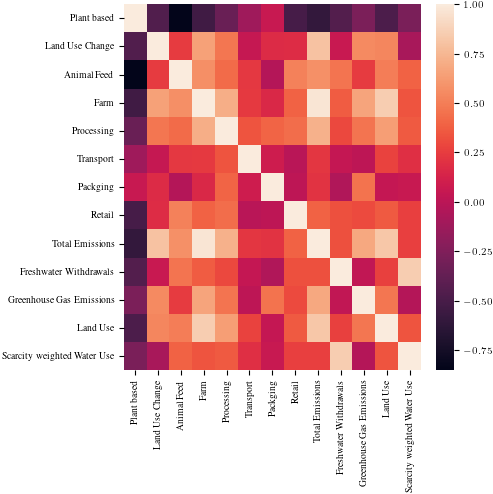

In [198]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (5,5))

    # Plotting code
    columns = ['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total Emissions',
       'Freshwater Withdrawals per kilogram (liters per kilogram)',
       'Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)',
       'Land Use per Kilogram (m2 per kilogram)',
       'Scarcity weighted Water Use per Kilogram (liters per kilogram)']
    labels = ['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total Emissions',
       'Freshwater Withdrawals',
       'Greenhouse Gas Emissions',
       'Land Use',
       'Scarcity weighted Water Use']
    data_corr = data[columns]
    data_corr = data_corr.set_axis(labels, axis=1).corr(numeric_only=True)
    corr_plot = sns.heatmap(data_corr, ax=axs)

    # Save plot
    fig.savefig(
    "figures/corrplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

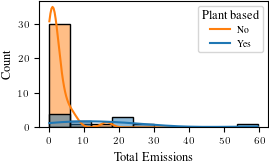

In [199]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Total Emissions", bins=10, legend=True, 
                              ax=axs, kde=True, hue="Plant based", data=data)
    plt.legend(title='Plant based', loc='upper right', labels=['No', 'Yes'])

    # Save plot
    fig.savefig(
    "figures/testplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

Observation:
- plant based emissions look chi-squared distributed

Problem:
-  Most tests assume gaussian distributed data.
So, let's transform data by applying  log and check out the distribution

### data Transformation:   log()

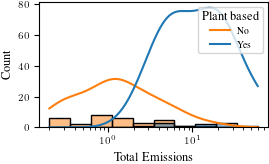

In [200]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Total Emissions", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=True, data=data, hue="Plant based")
    plt.legend(title='Plant based', loc='upper right', labels=['No', 'Yes'])

    # Save plot
    fig.savefig(
    "figures/logplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

### TODO:
- Test (and why this test)
    - depict reasoning as to why log scale and respective t-test plotting one w/o log-scale --> similar to chi-squared distribution, plus plot in log-scale, which shows a distribution mor similar to a normal distribution. 
    - experiment with kde, maybe no histogram but only kde and mean

# Data Analysis

## T-Tests

H_0:

H_1:
